In [1]:
import sys
import os
from pathlib import Path
import pandas as pd
from collections import Counter

# Add the directory to the search path
sys.path.append('../code')
sys.path.append('..')

In [2]:
import constants
print(os.getcwd())
os.environ["OPENAI_API_KEY"]=constants.OPENAI_API_KEY

c:\Users\linda.hemmann\Documents\FullTextTagging\notebooks


In [3]:
from pre_processing import extract_main_text
from custom_types import Paper
from utils import visualize_boxes

In [4]:

annotations_filepath = Path('../data/demo_data/demo_test.csv')

print(annotations_filepath)
annotations = pd.read_csv(annotations_filepath, header=0)
#annotations = annotations.groupby('Title')

..\data\demo_data\demo_test.csv


In [5]:
print('current directory: ' + os.getcwd())
data_path='../data/demo_data/'
files = [f for f in os.listdir(data_path) if f.endswith('.pdf')]
print('demofiles:')
for file in files:
    print(file)

current directory: c:\Users\linda.hemmann\Documents\FullTextTagging\notebooks
demofiles:
1-s2.0-S0090825815002577-main.pdf
1-s2.0-S014341799790086X-main.pdf
1-s2.0-S0167814004005663-main.pdf
1-s2.0-S1525730414002630-main.pdf
Cohort profile  four early uranium processing facilities in the US and Canada.pdf
mller et al_2012_Elevated Mortality among Birds in Chernobyl as Judged from Skewed Age and Sex.pdf
paper0.pdf
paper1.pdf
paper2.pdf
paper4.pdf
PII_ S0196-9781(97)00323-9.pdf
PII_ S1368-8375(98)00013-X.pdf
srep29901.pdf
WJG-11-7033.pdf


# Loop over annotated files

In [6]:
[x for x in annotations['Title'].unique() if str(x) != 'nan']

['Cohort profile: four early uranium processing facilities in the US and Canada',
 'Cell cycle and radiosensitivity of progeny of irradiated primary cultured human hepatocarcinoma cells',
 'Apollo Lunar Astronauts Show Higher Cardiovascular Disease Mortality: Possible Deep Space Radiation Effects on the Vascular Endothelium',
 'Elevated Mortality among Birds in Chernobyl as Judged from Skewed Age and Sex Ratios']

In [7]:
# Initialize an empty DataFrame to store the final results
result_df = pd.DataFrame()

# Iterate through each unique title in the original DataFrame
for title in [x for x in annotations['Title'].unique() if str(x) != 'nan']:
    # Select rows with the current title
    title_rows = annotations[annotations['Title'] == title]

    # Initialize a dictionary to store the most common answer for each question
    most_common_answers = {}

    # Iterate through each unique question in the original DataFrame
    for question in  [x for x in annotations['Question'].unique() if str(x) != 'nan']:
        # Select rows with the current title and question
        question_rows = title_rows[title_rows['Question'] == question]
        if len(question_rows)> 0:
            # Count the occurrences of each answer for the current question
            answer_counts = Counter(question_rows['Answer'])
            # Find the most common answer for the current question
            most_common_answer = answer_counts.most_common(1)[0][0]

            # Store the most common answer for the current question in the dictionary
            most_common_answers[question] = most_common_answer

    # Extract additional metadata columns for the current title
    metadata_columns = title_rows.iloc[0][['Url', 'Authors', 'PdfRelativePath']]  # Add more columns as needed

    # Combine metadata columns with most common answers dictionary
    row_data = {'Title': title, **metadata_columns.to_dict(), **most_common_answers}

    # Add a new row to the result DataFrame
    result_row = pd.DataFrame([row_data])

    # Append the row to the result DataFrame
    result_df = pd.concat([result_df, result_row], ignore_index=True)# Add a new row to the result DataFrame with the title and most common answers


In [17]:
def decision(paper, query):
    print(query)
    answer =  paper.query(query, prompt_type="classify")
    print(answer.answer)
    if answer.answer != "No":
        print("Context:")
        print(answer.context)

In [15]:
import nest_asyncio
nest_asyncio.apply()


In [18]:
for file in result_df.iterrows():
    #print(file[1])
    file = file[1]
    pdf_path = data_path+file['PdfRelativePath']
    paper = Paper(pdf_path = pdf_path)
    paper.read_paper()
    paper.embed_paper()
    #visualize_boxes(pdf_path = pdf_path, texts=paper.main_text , relative=False)
    query ="Is this study performed with humans, animals or in-vitro"
    test=  paper.query(query, prompt_type="type")
    print(test.answer)

    query ="Is the study a literature review?"
    decision(paper, query)


    query ="Is there evidence that the study does not include ionising radiation health/biological effects* ?"
    decision(paper, query)

    query ="Is the study focused on ONLY males or ONLY females?"
    decision(paper, query)

    print(file)
    print('\n')
    

Human study
Is the study a literature review?
No
Is there evidence that the study does not include ionising radiation health/biological effects* ?
No
Is the study focused on ONLY males or ONLY females?
No
Title                                                            Cohort profile: four early uranium processing ...
Url                                                              https://www.tandfonline.com/doi/full/10.1080/0...
Authors                                                          Ashley P. Golden;Cato M. Milder;Elizabeth D. E...
PdfRelativePath                                                  /Cohort profile  four early uranium processing...
This article concerns                                                                                        Human
Are you able to screen this article?                                                                           Yes
Are you including or excluding this study?                                                               

# Test creating a paper object and filling the data

In [5]:
pdf_path = data_path+files[1]
paper = Paper(pdf_path = pdf_path)
paper.read_paper()

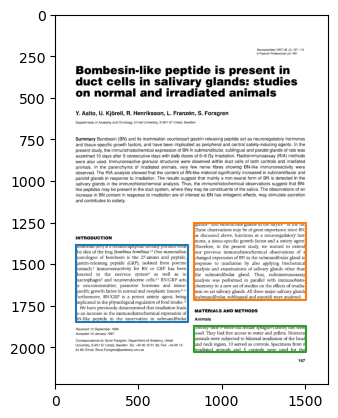

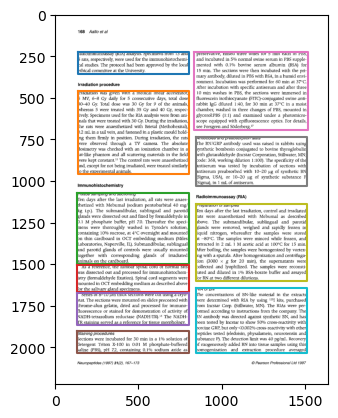

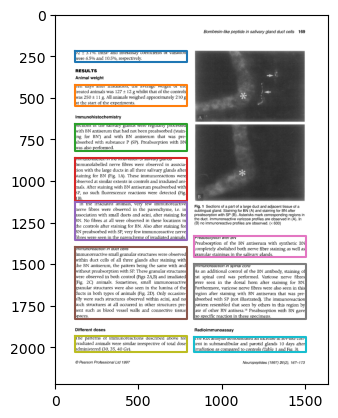

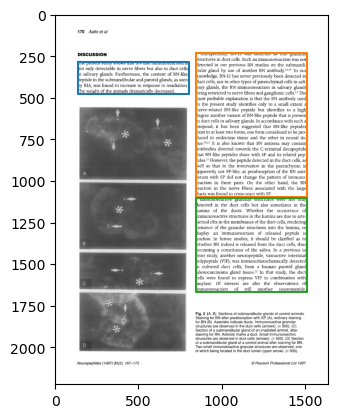

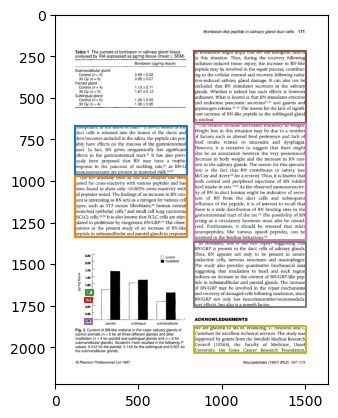

In [6]:
visualize_boxes(pdf_path = pdf_path, texts=paper.main_text , relative=False)

In [7]:
print(paper.main_text)
paper.embed_paper()

[Text(text='Bombesin (BN) is a tetradecapeptide initially purified from \nthe skin of the frog Bombina bombina. 1,2 One mammalian \nhomologue  of bombesin  is  the  27-amino  acid  peptide, \ngastrin-releasing  peptide  (GRP),  isolated  from  porcine \nstomach. 3 Immunoreactivity  for  BN  or  GRP  has  been \ndetected  in  the  nervous  system 4  as  well  as  in \nmacrophages 5 and  neuroendocrine  cellsY BN/GRP acts \nas  neurotransmitter,  paracrine  hormone  and  tissue- \nspecific growth factor in normal and neoplastic tissues. 8-~1 \nFurthermore,  BN/GRP  is  a  potent  satiety  agent,  being \nimplicated in the physiological regulation of food intake.~2 \nWe have previously demonstrated that irradiation leads \nto an increase in the immunohistochemical expression of \nBN-like  peptide  in  the  innervation  in  submandibular \n', page=0, bbox=[43.92, 498.0032, 286.757376, 664.5632], doc=None, embeddings=None), Text(text='glands ~3 and submucosal glands in the larynx ~4 of the 

In [8]:
print(paper.main_text)

[Text(text='Bombesin (BN) is a tetradecapeptide initially purified from \nthe skin of the frog Bombina bombina. 1,2 One mammalian \nhomologue  of bombesin  is  the  27-amino  acid  peptide, \ngastrin-releasing  peptide  (GRP),  isolated  from  porcine \nstomach. 3 Immunoreactivity  for  BN  or  GRP  has  been \ndetected  in  the  nervous  system 4  as  well  as  in \nmacrophages 5 and  neuroendocrine  cellsY BN/GRP acts \nas  neurotransmitter,  paracrine  hormone  and  tissue- \nspecific growth factor in normal and neoplastic tissues. 8-~1 \nFurthermore,  BN/GRP  is  a  potent  satiety  agent,  being \nimplicated in the physiological regulation of food intake.~2 \nWe have previously demonstrated that irradiation leads \nto an increase in the immunohistochemical expression of \nBN-like  peptide  in  the  innervation  in  submandibular \n', page=0, bbox=[43.92, 498.0032, 286.757376, 664.5632], doc=None, embeddings=[-0.037424664825581, 0.005689010471668505, 0.00340933561173877, 0.00076413

In [9]:
matches = paper.get_relevant_chapter("Is this study performed with humans, animals or in-vitro")
matches

[Document(page_content='radioimmunoassay (RIA) analysis. Specimens from 13 and \n5 rats, respectively, were used for the immunohistochemi- \ncal studies. The protocol had been approved by the local \nethical committee at the University. \n', metadata={'page': 1, 'bbox': [49.44, 81.41528000000005, 290.09497760000005, 127.73527999999999], 'doc': None}),
 Document(page_content='Twenty-nine 9-week-old female Sprague-Dawley rats were \nused. They had free access to water and pellets. Nineteen \nanimals were subjected to bilateral irradiation of the head \nand neck region, 10 served as controls. Specimens from 6 \nirradiated  animals  and  5  controls  were  used  for  the \n', metadata={'page': 0, 'bbox': [301.2, 673.4431999999999, 542.4310399999999, 731.2832], 'doc': None}),
 Document(page_content='As a reference, the lumbar spinal cord of normal rats \nwas dissected out and processed for immunohistochem- \nistry (formaldehyde fixation). Spinal cord segments were \nmounted in OCT embedding

In [10]:
for match in matches:
    print(match)
    print(match.page_content)
    #visualize_boxes(pdf_path = pdf_path, texts=match.main_text , relative=False)

page_content='radioimmunoassay (RIA) analysis. Specimens from 13 and \n5 rats, respectively, were used for the immunohistochemi- \ncal studies. The protocol had been approved by the local \nethical committee at the University. \n' metadata={'page': 1, 'bbox': [49.44, 81.41528000000005, 290.09497760000005, 127.73527999999999], 'doc': None}
radioimmunoassay (RIA) analysis. Specimens from 13 and 
5 rats, respectively, were used for the immunohistochemi- 
cal studies. The protocol had been approved by the local 
ethical committee at the University. 

page_content='Twenty-nine 9-week-old female Sprague-Dawley rats were \nused. They had free access to water and pellets. Nineteen \nanimals were subjected to bilateral irradiation of the head \nand neck region, 10 served as controls. Specimens from 6 \nirradiated  animals  and  5  controls  were  used  for  the \n' metadata={'page': 0, 'bbox': [301.2, 673.4431999999999, 542.4310399999999, 731.2832], 'doc': None}
Twenty-nine 9-week-old female Sp

In [11]:
matches2 = paper.get_relevant_chapter("Is there evidence that the study does not include ionising radiation health/biological effects* ?")
for match in matches2:
    #print(match)
    print(match.page_content)


Twenty-nine 9-week-old female Sprague-Dawley rats were 
used. They had free access to water and pellets. Nineteen 
animals were subjected to bilateral irradiation of the head 
and neck region, 10 served as controls. Specimens from 6 
irradiated  animals  and  5  controls  were  used  for  the 

Irradiation was  given with  a  medical linear  accelerator, 
6  MV,  6-8  Gy daily for  5  consecutive  days, total  dose 
30-40  Gy. Total  dose  was  30  Gy for 9  of the  animals, 
whereas  5 were treated with  35  Gy and  40  Gy, respec- 
tively. Specimens used for the RIA analysis were from ani- 
mals that were treated with 30 Gy. During the irradiation, 
the  rats  were  anaesthetized with  Brietal  (Methohexital), 
0.2 mL in a tail vein, and fastened in a plastic mould hold- 
ing them  firmly in position. During irradiation, the  rats 
were  observed  through  a  TV  camera.  The  absolute 
dosimetry was checked with an ionization chamber in a 
rat-like phantom and all scattering materia

In [12]:
matches2 = paper.get_relevant_chapter("Is the study about the effect on the central nervous system?")
for match in matches2:
    print(match)
    print(match.page_content)

page_content='The  treated  animals  decreased  markedly  in  weight. \nWeight loss in this  situation  may be  due  to  a number \nof factors  such  as  altered food preference and  lack  of \nfood  intake  related  to  mucositis  and  dysphagia. \nHowever,  it  is  tentative  to  suggest  that  there  might \nalso  be  an  association  between  the  very pronounced \ndecrease  in  body weight  and  the  increase  in  BN con- \ntent in the salivary glands. The reason for this specula- \ntion  is  the  fact  that  BN  contributes  to  satiety  (see \nMcCoy and Avery 3+ for a review). Thus, it is known that \nboth  central  and  peripheral  injections  of  BN  inhibit \nfood intake in rats. 3z38 As the observed immunoreactiv- \nity of BN in duct lumina  might be indicative  of secre- \ntion  of  BN  from  the  duct  cells  and  subsequent \ninfluence  of the  peptide,  it is  of interest  to recall that \nthere  is a wide  distribution  of BN binding  sites in the \ngastrointestinal tra

In [13]:
matches2 = paper.get_relevant_chapter("Are all the subjects exposed to other chemical, biological or physical agents then radiation ?")
for match in matches2:
    print(match)
    print(match.page_content)

page_content='The  patterns  of  immunoreactions  described  above  for \nirradiated animals were similar irrespective of total dose \nadministered (30, 35, 40 Gy). \n' metadata={'page': 2, 'bbox': [43.44, 696.4832, 285.2617502879999, 729.8432], 'doc': None}
The  patterns  of  immunoreactions  described  above  for 
irradiated animals were similar irrespective of total dose 
administered (30, 35, 40 Gy). 

page_content='Irradiation was  given with  a  medical linear  accelerator, \n6  MV,  6-8  Gy daily for  5  consecutive  days, total  dose \n30-40  Gy. Total  dose  was  30  Gy for 9  of the  animals, \nwhereas  5 were treated with  35  Gy and  40  Gy, respec- \ntively. Specimens used for the RIA analysis were from ani- \nmals that were treated with 30 Gy. During the irradiation, \nthe  rats  were  anaesthetized with  Brietal  (Methohexital), \n0.2 mL in a tail vein, and fastened in a plastic mould hold- \ning them  firmly in position. During irradiation, the  rats \nwere  observed  t

In [14]:
for match in matches2:
    print(match.metadata['page'])
    print(match.metadata['bbox'])

2
[43.44, 696.4832, 285.2617502879999, 729.8432]
1
[48.72, 166.13528000000008, 290.0803776, 345.65528]
0
[301.2, 673.4431999999999, 542.4310399999999, 731.2832]


# Anwser class 


In [15]:
from help_types import Answer
import nest_asyncio
nest_asyncio.apply()

In [16]:
query ="Is this study performed with humans, animals or in-vitro"
#"Are all the subjects exposed to other chemical, biological or physical agents then radiation? If nothing refers to such case we asume that not?"
qa1 = Answer(question=query, answer_length= "about 10 words")

qa2=  paper.get_context(qa1)

In [17]:
qa2.answer

''

In [28]:
test=  paper.query(query, prompt_type="type")

In [29]:
test.answer

'Animal study'

In [20]:
test2 =  paper.query('',answer=qa1,length_prompt= "about 10 words")

In [21]:
test2

Answer(question='Is this study performed with humans, animals or in-vitro', answer='Animals', context='radioimmunoassay (RIA) analysis. Specimens from 13 and \n5 rats, respectively, were used for the immunohistochemi- \ncal studies. The protocol had been approved by the local \nethical committee at the University. \n\n\nTwenty-nine 9-week-old female Sprague-Dawley rats were \nused. They had free access to water and pellets. Nineteen \nanimals were subjected to bilateral irradiation of the head \nand neck region, 10 served as controls. Specimens from 6 \nirradiated  animals  and  5  controls  were  used  for  the \n\n\nAs a reference, the lumbar spinal cord of normal rats \nwas dissected out and processed for immunohistochem- \nistry (formaldehyde fixation). Spinal cord segments were \nmounted in OCT embedding medium as described above \nfor the salivary gland specimens. \n', contexts=[Context(context='radioimmunoassay (RIA) analysis. Specimens from 13 and \n5 rats, respectively, were u

In [22]:
len(qa1.context)

764